# BlackFriday
The challenge is to predict purchase prices of various products purchased by customers based on historical purchase patterns. The dataset is comprised of 550,000 observations about Black Friday shoppers in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.

## Table of contents
* Introduction
* Hypothesis
* EDA
   * data cleaning
   * data Analysis
* Modeling
   * Feature engineering
* Conclusion

## Introduction
#### Origins:
The origins of "Black Friday" stem not from a day filled with shopping, discounts, and a turn of the holiday season, but rather with a financial crisis! The first recorded use of the term "Black Friday" was recorded on September 24th, 1869 when two Wall Street businessmen, Jay Gould and Jim Fisk, decided to artifically inflate the price of gold and attempted to sell it for profit. As a result of their nefarious actions, on that specific Friday in September 1869, the price of Gold dropped and the United States plunged into a state of financial devestation.


#### First Recorded Use:
Various stories exist regarding the first recorded use of the term as it relates to holiday shopping, but its connotation continued to keep a negetive stigma associated with it until the late 20th century.
"Black Friday" and its relation to consumerism first derived from 1950s Philadelphia. Philadelphia suburbinites descended on the city after the Thanksgiving holiday, to watch the traditional Army/Navy college football game and take advantage of sales and promotions brought about by the influx of spectators to the city. Philidelphia Police Officers who were assigned to work that weekend coined the term due to their long grueling shifts and the mass amounts of people/shoppers. Philidelphia businesses also started to use the term to describe the long lines and shopping mayhem at their stores.


#### Use Within Business:
Although the term "Black Friday" originally represented the pitfalls of two Wall Street businessmen and the mayhem of downtown Philadephia following Thanksgiving, it is now familiarly known today as the busiest shopping day of the year.
One possible explanation/rumor for the term as it relates to consumers and retailers is that "Black Friday" represents the first day of the year in which businesses were turning profits and accounting was done on a hand-written ledger. As described Oxford Dictionary, "The use of colors in accounting refers back to the bookkeeping practice of recording the credit side of an account in a ledger in black ink and the debit side in red ink." (Oxford Dictionaries) Hence the name, "Black Friday" being associated with businesses debits overtaking their credits. Although this idea might make sense, the claim hasn't been completely verified.

#### In Recent Times:

"Black Friday as we know it today is an extravaganza of sales, promotions, and long lines outside of stores. Retailers such as Target, Best Buy, Amazon, and many others look forward to this day every year with the hopes that consumers will take advantage of door-busting deals. The term "Black Friday" has also spawned other retail holidays such as "Cyber Monday", "Small-Business Saturday", and "Giving Tuesday." Here are a few note-worthy statistics from 2018's "Black Friday."

ref: https://bit.ly/2JF4clG

## Hypothesis
#### City Level 
* City Type and Size : Tier 1 cities have higher sales because if the higher levels of people there.
* Population Density : Highly populated cities have higher sales
* Population Age : cities with a young generation buy more

#### Customer Level Hypotheses
* Income: People with higher income should spend more on products.
* Age and Gender: Men with ages ranging from 25 to 40 should spend more on techlogical products.
* Family Size: Families should be more contained on spendings, just buying the best offers and only needed products.
* Purchase History: Customer with a purchase history should be more willing to purchase more products on this day.

#### Store level Hypotheses
* Location: Stores with a location in well moved streets should have better sales.
* Size: Bigger stores with higher stores and variety of products should have better sales.

#### Product Level Hypotheses:
* Category: Most clients should be looking to buy technological products;
* Price: Customer will spend more on products with higher discounts

## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

In [5]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577,537577,537577,537577.00000,537577,537577,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
unique,NaN,3623,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1858,405380,214690,NaN,226493,189192,NaN,NaN,NaN,NaN,NaN
mean,1.002992e+06,NaN,NaN,NaN,8.08271,NaN,NaN,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,NaN,NaN,NaN,6.52412,NaN,NaN,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,NaN,NaN,NaN,0.00000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,NaN,NaN,NaN,2.00000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,NaN,NaN,NaN,7.00000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,NaN,NaN,NaN,14.00000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12073.000000


In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [8]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

The data consists fo 537577 entries with 12 columns, each representing a corresponding variable below.
* User_ID: Unique identifier of shopper.
* Product_ID: Unique identifier of product. (No key given)
* Gender: Sex of shopper.
* Age: Age of shopper split into bins.
* Occupation: Occupation of shopper. (No key given)
* City_Category: Residence location of shopper. (No key given)
* Stay_In_Current_City_Years: Number of years stay in current city.
* Marital_Status: Marital status of shopper.
* Product_Category_1: Product category of purchase.
* Product_Category_2: Product may belong to other category.
* Product_Category_3: Product may belong to other category.
* Purchase: Purchase amount in dollars.


In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

The null values present are for `Product_Category_2` and `Product_Category_3` .
#### filling missing values.

In [10]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(0)

In [11]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(0)

In [12]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Analysis against the target.
The target in our case is the Purchase.

/home/muoki/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Purchase amount Distribution')

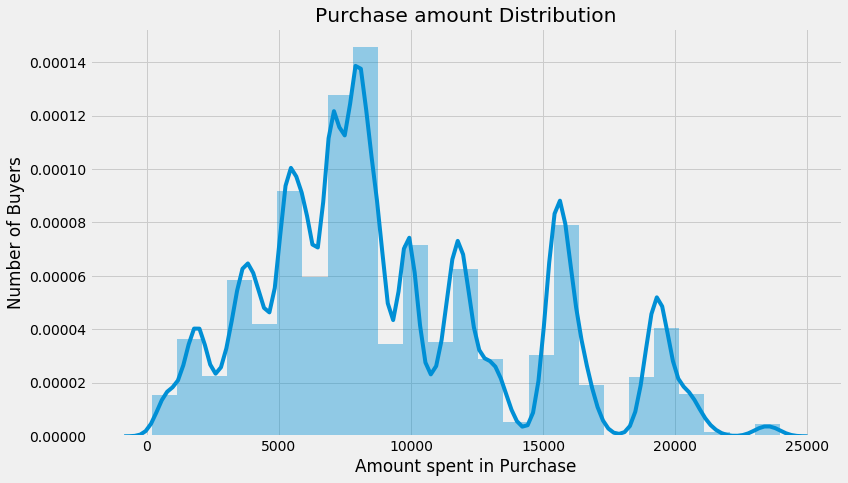

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

target variable has an almost Gaussian distribution.

In [14]:
print ("Skew is:", df.Purchase.skew())
print("Kurtosis: %f" % df.Purchase.kurt())

Skew is: 0.6242797316083074
Kurtosis: -0.343121


In [15]:
def hypo_plot(col):
    sns.countplot(df[col])
    print('Value counts of {} \n {}' .format(col,df[col].value_counts().sort_values(ascending=False)))
    cplot_pivot = df.pivot_table(index=col, values="Purchase", aggfunc=np.mean)
    cplot_pivot.plot(kind='bar', color='blue',figsize=(12,10))
    plt.xlabel(col)
    plt.ylabel("Purchase")
    plt.title(col + " and Purchase Analysis")
    plt.xticks(rotation=0)
    
    plt.show()
    print('\n {}' .format(df.groupby(df[col]).mean()['Purchase'].sort_values(ascending=False)))
    
    print("\n")

#### City_Category

Value counts of City_Category 
 B    226493
C    166446
A    144638
Name: City_Category, dtype: int64


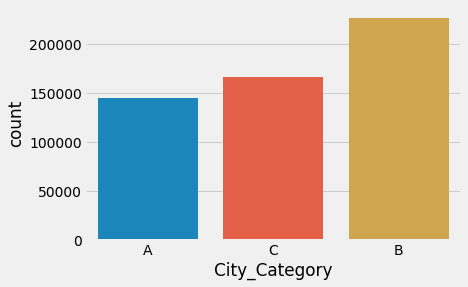

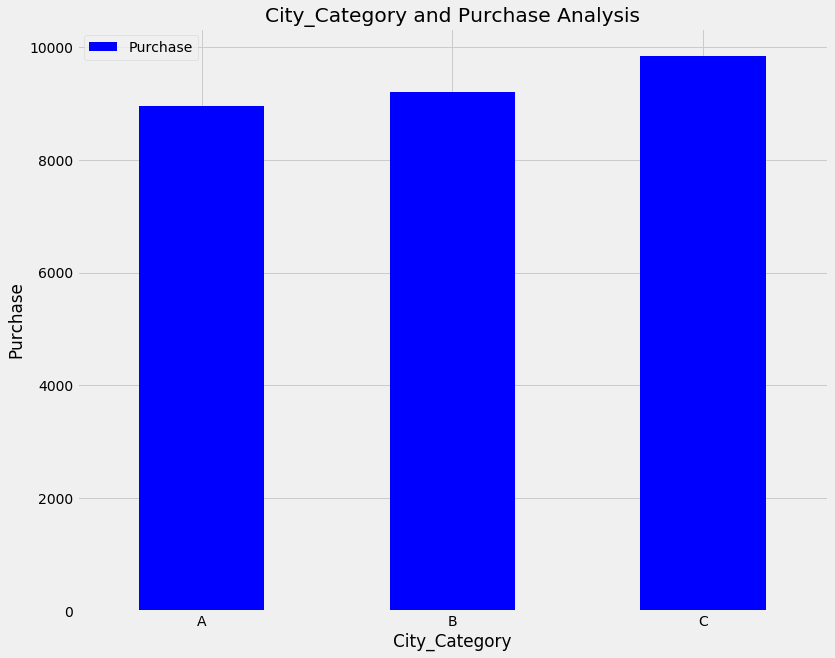


 City_Category
C    9844.441855
B    9198.657848
A    8958.011014
Name: Purchase, dtype: float64




In [16]:
hypo_plot("City_Category")

City_Category B has more people but City_Category C has more purchases. This shows that having a large population doesn't gaurantee high sales.

#### Age

Value counts of Age 
 26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64


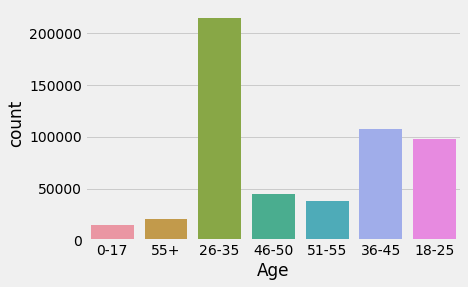

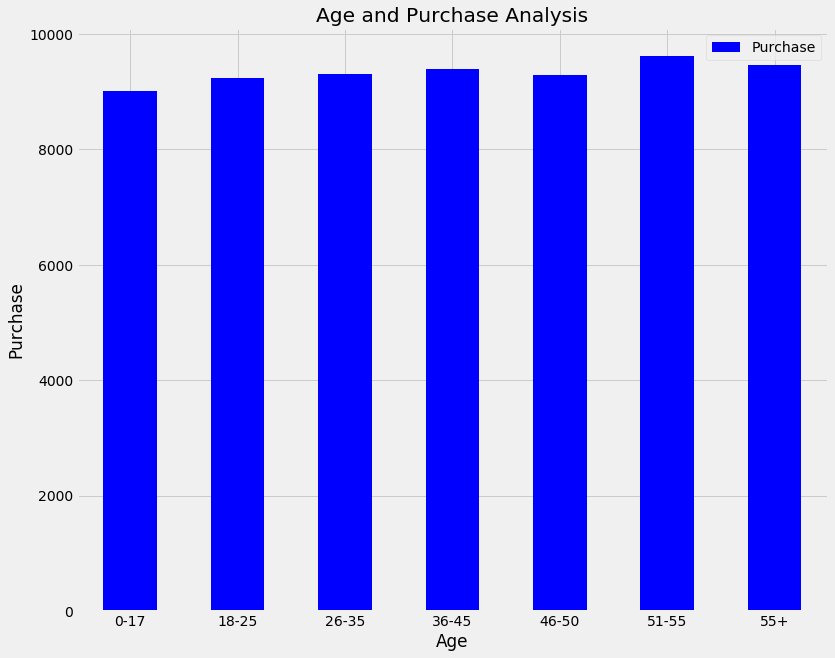


 Age
51-55    9620.616620
55+      9453.898579
36-45    9401.478758
26-35    9314.588970
46-50    9284.872277
18-25    9235.197575
0-17     9020.126878
Name: Purchase, dtype: float64




In [17]:
hypo_plot("Age")

There are more 26-35 year old than any other group but 51-55 spend more.

#### Occupation.

Value counts of Occupation 
 4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64


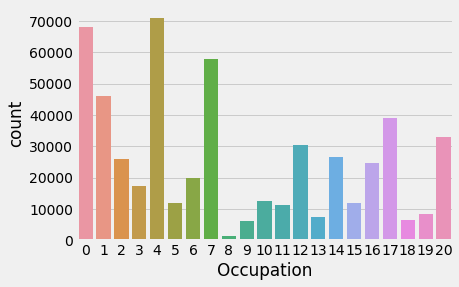

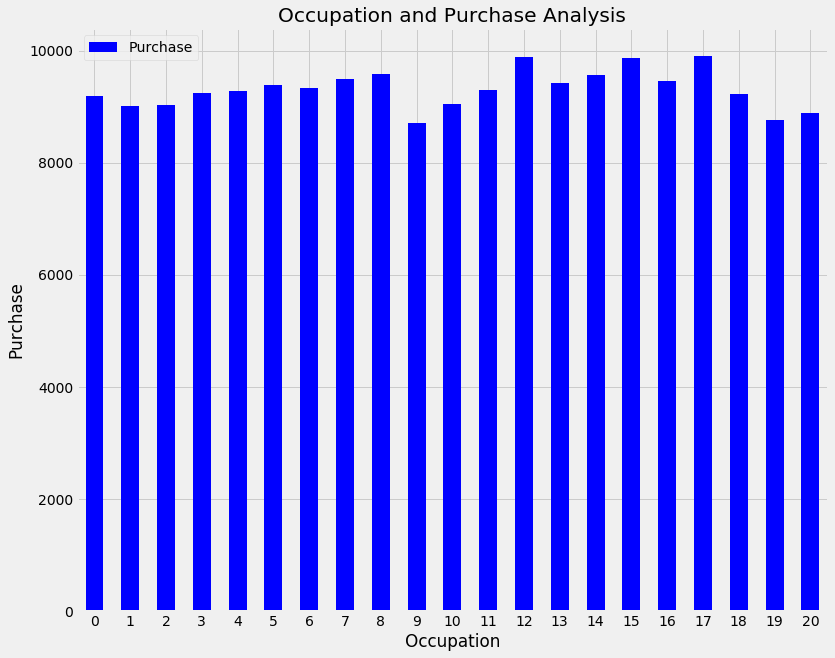


 Occupation
17    9906.378997
12    9883.052460
15    9866.239925
8     9576.508530
14    9568.536426
7     9502.175276
16    9457.133118
13    9424.449391
5     9388.848978
6     9336.378620
11    9299.467190
4     9279.026742
3     9238.077277
18    9233.671418
0     9186.946726
10    9052.836410
2     9025.938982
1     9017.703095
20    8881.099514
19    8754.249162
9     8714.335934
Name: Purchase, dtype: float64




In [18]:
hypo_plot("Occupation")

#### Age Gender

In [29]:
df[df["Age"] == '0-17'][df["Gender"]=='M']["Purchase"].mean()

/home/muoki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


9312.322226778757

Occupation 4 has the largest number of people but people with occupation 17 spend more in purchases.
Currently there is no way of telling what each of the Occupations rep.